In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark import SparkContext
#from pyspark.sql import SQLContext


# initialize a new Spark Context to use for the execution of the script
sc = SparkContext(appName="MY-APP-NAME", master="local[*]")
#sqlCtx = SQLContext(sc)
# prevent useless logging messages
sc.setLogLevel("ERROR")

In [2]:
from pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder \
    .master("local") \
    .appName("AppName") \
    .getOrCreate()

In [3]:
# load the dataset
data = spark.read.csv("data.csv", header=True, sep=',',inferSchema="true")
data = data.withColumn("distance", data['swimDistance'] + data['walkDistance'] + data['rideDistance'])
data.dtypes

[('Id', 'string'),
 ('groupId', 'string'),
 ('matchId', 'string'),
 ('assists', 'int'),
 ('boosts', 'int'),
 ('damageDealt', 'double'),
 ('DBNOs', 'int'),
 ('headshotKills', 'int'),
 ('heals', 'int'),
 ('killPlace', 'int'),
 ('killPoints', 'int'),
 ('kills', 'int'),
 ('killStreaks', 'int'),
 ('longestKill', 'double'),
 ('matchDuration', 'int'),
 ('matchType', 'string'),
 ('maxPlace', 'int'),
 ('numGroups', 'int'),
 ('rankPoints', 'int'),
 ('revives', 'int'),
 ('rideDistance', 'double'),
 ('roadKills', 'int'),
 ('swimDistance', 'double'),
 ('teamKills', 'int'),
 ('vehicleDestroys', 'int'),
 ('walkDistance', 'double'),
 ('weaponsAcquired', 'int'),
 ('winPoints', 'int'),
 ('winPlacePerc', 'double'),
 ('distance', 'double')]

In [4]:
from pyspark.sql import SQLContext

sqlCtx = SQLContext(sc)

data.createOrReplaceTempView("pubg")

In [6]:
tmp = sqlCtx.sql("""SELECT groupid, sum(kills) as kills FROM pubg GROUP BY groupid""")
tmp.show()

+--------------+-----+
|       groupid|kills|
+--------------+-----+
|e49ee4c00569f4|    0|
|318d4990302b75|    1|
|a511c9d12bce8c|    2|
|879fc11ef5ea53|    0|
|8058badb744523|    1|
|dd8e0a7663e2dd|    3|
|98441b5004bb9b|    4|
|c8dc696c100bd8|    8|
|0cdde74f9b6c87|    0|
|f27d36494701cd|    2|
|9f1fffe848bd7b|    0|
|e619a44ea01789|    7|
|70fe5f11951e53|    2|
|41d210e8e55296|    2|
|939b390645e37d|    1|
|ba5f051af21a68|    2|
|e1cdf0849e5e5f|   10|
|70886d91a0f088|    0|
|d1c7c77d397ef5|    1|
|c67562a1ad595d|    3|
+--------------+-----+
only showing top 20 rows



In [17]:
data.columns

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [12]:
data[['Id', 'groupId', 'matchId', 'assists']].take(5)

[Row(Id='7f96b2f878858a', groupId='4d4b580de459be', matchId='a10357fd1a4a91', assists=0),
 Row(Id='eef90569b9d03c', groupId='684d5656442f9e', matchId='aeb375fc57110c', assists=0),
 Row(Id='1eaf90ac73de72', groupId='6a4a42c3245a74', matchId='110163d8bb94ae', assists=1),
 Row(Id='4616d365dd2853', groupId='a930a9c79cd721', matchId='f1f1f4ef412d7e', assists=0),
 Row(Id='315c96c26c9aac', groupId='de04010b3458dd', matchId='6dc8ff871e21e6', assists=0)]

In [70]:
data[data['headshotKills']>1][['roadKills', 'headshotKills', 'teamKills', 'kills']].show(20)

+---------+-------------+---------+-----+
|roadKills|headshotKills|teamKills|kills|
+---------+-------------+---------+-----+
|        0|            2|        0|    2|
|        0|            2|        0|    9|
|        0|            2|        0|    5|
|        0|            2|        0|    4|
|        0|            3|        0|    4|
|        0|            2|        0|    6|
|        0|            2|        0|    5|
|        0|            3|        0|    6|
|        0|            2|        0|    4|
|        0|            2|        0|    3|
|        0|            3|        0|    8|
|        0|            2|        0|    2|
|        0|            2|        0|    3|
|        0|            2|        0|    5|
|        0|            2|        0|    2|
|        0|            3|        0|    5|
|        0|            2|        0|    4|
|        0|            3|        0|   14|
|        0|            2|        0|    2|
|        0|            2|        0|    5|
+---------+-------------+---------

In [71]:
data = data.withColumn("distance", data['swimDistance'] + data['walkDistance'] + data['rideDistance'])
data[['distance', 'swimDistance', 'walkDistance', 'rideDistance']].show(5)

+---------+------------+------------+------------+
| distance|swimDistance|walkDistance|rideDistance|
+---------+------------+------------+------------+
|    244.8|         0.0|       244.8|         0.0|
|1445.0445|       11.04|      1434.0|      0.0045|
|    161.8|         0.0|       161.8|         0.0|
|    202.7|         0.0|       202.7|         0.0|
|    49.75|         0.0|       49.75|         0.0|
+---------+------------+------------+------------+
only showing top 5 rows



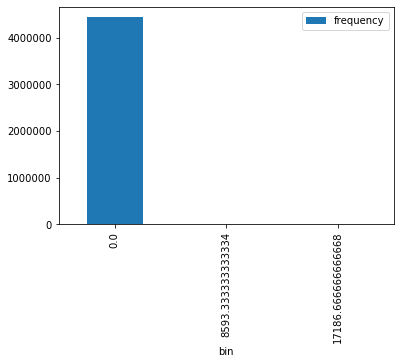

In [72]:
histogram = data.select('walkDistance').rdd.flatMap(lambda x: x).histogram(3)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [35]:
match_type = data.groupby('matchType').count().rdd.map(lambda x: (x[0], x[1])).collect()
match_type.sort()

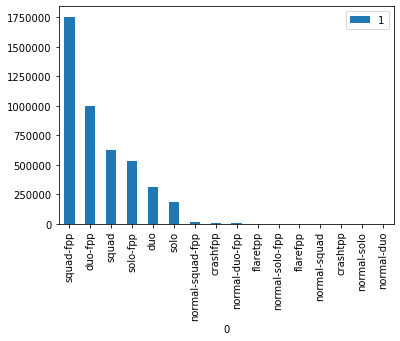

In [41]:
pd.DataFrame(match_type).set_index(0).sort_values(by=1, ascending=False).plot(kind='bar')

In [65]:
tmp = sqlCtx.sql("""SELECT maxPlace, winplaceperc, matchType, 1+(1-winplaceperc)*(maxPlace) AS tmp, groupid 
FROM pubg 
WHERE matchid = 'a10357fd1a4a91' ORDER BY tmp""")
tmp.show(100)

+--------+------------+---------+------------------+--------------+
|maxPlace|winplaceperc|matchType|               tmp|       groupid|
+--------+------------+---------+------------------+--------------+
|      28|         1.0|squad-fpp|               1.0|3fe42857a5d0e3|
|      28|         1.0|squad-fpp|               1.0|3fe42857a5d0e3|
|      28|         1.0|squad-fpp|               1.0|3fe42857a5d0e3|
|      28|         1.0|squad-fpp|               1.0|3fe42857a5d0e3|
|      28|       0.963|squad-fpp| 2.036000000000001|5112ebf44e9575|
|      28|       0.963|squad-fpp| 2.036000000000001|5112ebf44e9575|
|      28|       0.963|squad-fpp| 2.036000000000001|5112ebf44e9575|
|      28|       0.963|squad-fpp| 2.036000000000001|5112ebf44e9575|
|      28|      0.9259|squad-fpp|3.0748000000000015|69c3ba1a23df2a|
|      28|      0.9259|squad-fpp|3.0748000000000015|69c3ba1a23df2a|
|      28|      0.9259|squad-fpp|3.0748000000000015|69c3ba1a23df2a|
|      28|      0.9259|squad-fpp|3.0748000000000

In [68]:
tmp = sqlCtx.sql("""SELECT maxPlace, winplaceperc, matchType, matchid FROM pubg Limit 10""")
tmp.show(100)

+--------+------------+---------+--------------+
|maxPlace|winplaceperc|matchType|       matchid|
+--------+------------+---------+--------------+
|      28|      0.4444|squad-fpp|a10357fd1a4a91|
|      26|        0.64|squad-fpp|aeb375fc57110c|
|      50|      0.7755|      duo|110163d8bb94ae|
|      31|      0.1667|squad-fpp|f1f1f4ef412d7e|
|      97|      0.1875| solo-fpp|6dc8ff871e21e6|
|      28|       0.037|squad-fpp|bac52627a12114|
|      28|         0.0|squad-fpp|a8274e903927a2|
|      96|      0.7368| solo-fpp|292611730ca862|
|      28|      0.3704|    squad|df014fbee741c6|
|      29|      0.2143|    squad|3d3031c795305b|
+--------+------------+---------+--------------+



In [73]:
tmp = sqlCtx.sql("""SELECT maxPlace, winplaceperc, matchType, matchid 
                        FROM pubg 
                        WHERE matchid='292611730ca862' 
                        ORDER BY winplaceperc DESC
                        """)
tmp.show(200)

+--------+------------+---------+--------------+
|maxPlace|winplaceperc|matchType|       matchid|
+--------+------------+---------+--------------+
|      96|         1.0| solo-fpp|292611730ca862|
|      96|      0.9895| solo-fpp|292611730ca862|
|      96|      0.9789| solo-fpp|292611730ca862|
|      96|      0.9684| solo-fpp|292611730ca862|
|      96|      0.9579| solo-fpp|292611730ca862|
|      96|      0.9474| solo-fpp|292611730ca862|
|      96|      0.9368| solo-fpp|292611730ca862|
|      96|      0.9263| solo-fpp|292611730ca862|
|      96|      0.9158| solo-fpp|292611730ca862|
|      96|      0.9053| solo-fpp|292611730ca862|
|      96|      0.8947| solo-fpp|292611730ca862|
|      96|      0.8842| solo-fpp|292611730ca862|
|      96|      0.8737| solo-fpp|292611730ca862|
|      96|      0.8632| solo-fpp|292611730ca862|
|      96|      0.8526| solo-fpp|292611730ca862|
|      96|      0.8421| solo-fpp|292611730ca862|
|      96|      0.8316| solo-fpp|292611730ca862|
|      96|      0.82

# Data Description

- Id: PK

# TODO

- convertire il match_type in numerico e separare prima o terza persona
- Numero di utenti effettivi per gruppo
- numero di utenti effettivi per partita